In [20]:
import numpy as np
import pandas as pd

In [21]:
# Load your training data set and test data
df_train = pd.read_csv("income.csv")
X_test = pd.read_csv("income_Xtest.csv")

In [22]:
# Clean the dataset: remove the rows with " ?"
# clean the train dataset 
df_train = df_train.replace(" ?", np.nan).dropna()
X_test = X_test.replace(" ?", np.nan).dropna()

In [23]:
# Split data into X and y
X = df_train.drop('income', axis = 1)
y = df_train['income']

### Standardization and One-hot Encoding

Standardize the continuous features and convert categorical variables into dummy variables

In [24]:
# get the numerical and categorical variable names
grouped = df_train.groupby(df_train.dtypes, axis=1).groups
grouped

{dtype('int64'): Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
        'hours-per-week'],
       dtype='object'),
 dtype('O'): Index(['workclass', 'education', 'marital-status', 'occupation',
        'relationship', 'race', 'sex', 'native-country', 'income'],
       dtype='object')}

In [25]:
# numerical variables - standardize separately to prevent data leakage
from sklearn.preprocessing import StandardScaler
numerical = ['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']
scaler = StandardScaler().fit(X[numerical])

X_scaled = scaler.transform(X[numerical])
X_test_scaled = scaler.transform(X_test[numerical])

X_scaled = pd.DataFrame(X_scaled)
X_test_scaled = pd.DataFrame(X_test_scaled)

In [26]:
# categorical variables
from sklearn.preprocessing import OneHotEncoder
categorical = ['workclass','education','marital-status','occupation','relationship','race','sex','native-country']
enc = OneHotEncoder(drop = 'first').fit(X[categorical])

X_ohe = enc.transform(X[categorical]).toarray()
X_test_ohe = enc.transform(X_test[categorical]).toarray()

X_ohe = pd.DataFrame(X_ohe)
X_test_ohe = pd.DataFrame(X_test_ohe)

In [27]:
X = pd.concat([X_scaled,X_ohe],axis = 1)
X

,0,1,2,3,4,5,0,1,2,3,...,78,79,80,81,82,83,84,85,86,87
0,-0.471588,-0.269636,1.268390,-0.123479,-0.191138,-0.008782,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.359645,-0.722019,-0.356121,-0.123479,-0.191138,-0.008782,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.093755,-1.525864,-0.356121,-0.123479,-0.191138,-0.008782,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.115312,-1.537238,-1.574504,-0.123479,5.235000,0.578602,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.359645,-0.785702,0.456135,-0.123479,-0.191138,-0.008782,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3406,0.510778,-0.983111,-0.356121,-0.123479,-0.191138,-0.008782,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3407,0.510778,-0.776942,0.862262,-0.123479,-0.191138,1.333811,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3408,0.813045,-0.663054,-0.356121,2.404718,-0.191138,-0.008782,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3409,0.888612,-1.405849,1.268390,1.069299,-0.191138,0.326866,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [28]:
X_test = pd.concat([X_test_scaled,X_test_ohe],axis = 1)
X_test

,0,1,2,3,4,5,0,1,2,3,...,78,79,80,81,82,83,84,85,86,87
0,-0.018188,-0.387121,-1.168376,-0.123479,-0.191138,-0.008782,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.510778,0.939260,0.050007,-0.123479,-0.191138,1.669460,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.493145,-1.311084,0.050007,-0.123479,-0.191138,-1.267464,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.622722,1.931949,0.050007,-0.123479,-0.191138,-0.008782,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.342012,0.053201,-0.356121,-0.123479,-0.191138,0.830339,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921,-0.018188,2.730260,0.050007,-0.123479,-0.191138,0.830339,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
922,-1.227255,-0.736341,0.050007,-0.123479,-0.191138,-2.106585,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
923,0.888612,-0.254545,0.050007,-0.123479,-0.191138,-0.008782,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
924,0.132945,-1.290894,1.674518,-0.123479,-0.191138,0.830339,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [29]:
y = pd.get_dummies(y).iloc[:,1]
y = pd.DataFrame(y)

#### Splitting training data into training and validation set

In [30]:
X_train = X.iloc[:2800,:]
y_train = y.iloc[:2800,:]
X_val = X.iloc[2800:,:]
y_val = y.iloc[2800:,:]

In [31]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(2800, 94)
(611, 94)
(926, 94)


## Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
# First, initialize the classifier with default parameters
# then fit the classifier on training data and labels
LR = LogisticRegression(random_state=0)
LR.fit(X_train, y_train.values.ravel())

# predict the output for validation dataset
y_preds = LR.predict(X_val)

In [96]:
def precision(y, y_preds):
    """
    Return precision, which is TP/(TP+FP)
    """
    TP = 0
    FP = 0 
    for i in range(len(y_preds)):
        if y_preds[i] == y[i] == 1:
            TP += 1
        elif y_preds[i] == 1 and y_preds[i] != y[i]:
            FP += 1
    return(TP/(TP+FP))

def recall(y, y_preds):
    """
    Return recall, which is TP/(TP+FN)
    """
    TP = 0
    FN = 0 
    for i in range(len(y_preds)):
        if y_preds[i] == y[i] == 1:
            TP += 1
        elif y_preds[i] == 0 and y_preds[i] != y[i]:
            FN += 1
    return(TP/(TP+FN))


def accuracy(y, y_preds):
    """
    Return accuracy, which is (TP+TN)/(TP+FP+FN+TN)
    """
    TP = 0
    TN = 0
    for i in range(len(y_preds)):
        if y_preds[i] == y[i] == 1:
            TP += 1
        elif y_preds[i] == y[i] ==  0:
            TN += 1
    return((TP+TN)/(len(y_preds)))

In [34]:
# Using the predictions to calculate accuracy, precision, recall
print(accuracy(y_val.values, y_preds))
print(precision(y_val.values, y_preds))
print(recall(y_val.values, y_preds))

0.7594108019639935
0.8297872340425532
0.21910112359550563


### ROC curve

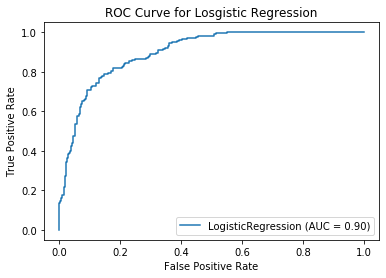

In [35]:
from sklearn.metrics import roc_curve
import sklearn.metrics as metrics

# method I: plt
import matplotlib.pyplot as plt

metrics.plot_roc_curve(LR, X_val, y_val)
plt.title("ROC Curve for Losgistic Regression")
plt.show()

In [36]:
LR1 = LogisticRegression(C=0.1,penalty='l1',solver='liblinear',random_state=0)
LR1.fit(X_train, y_train.values.ravel())
y_preds1 = LR1.predict(X_val)

In [37]:
print(accuracy(y_val.values, y_preds1))
print(precision(y_val.values, y_preds1))
print(recall(y_val.values, y_preds1))

0.7495908346972177
1.0
0.1404494382022472


In [38]:
LR2 = LogisticRegression(C=0.5,penalty='l1',solver='liblinear',random_state=0)
LR2.fit(X_train, y_train.values.ravel())
y_preds2 = LR2.predict(X_val)

In [39]:
print(accuracy(y_val.values, y_preds2))
print(precision(y_val.values, y_preds2))
print(recall(y_val.values, y_preds2))

0.7594108019639935
0.8444444444444444
0.21348314606741572


In [40]:
LR3 = LogisticRegression(C=0.1,penalty='l2',random_state=0)
LR3.fit(X_train, y_train.values.ravel())
y_preds3 = LR3.predict(X_val)

In [41]:
print(accuracy(y_val.values, y_preds3))
print(precision(y_val.values, y_preds3))
print(recall(y_val.values, y_preds3))

0.7594108019639935
0.9428571428571428
0.1853932584269663


In [42]:
LR4 = LogisticRegression(C=0.5,penalty='l2',random_state=0)
LR4.fit(X_train, y_train.values.ravel())
y_preds4 = LR4.predict(X_val)

In [43]:
print(accuracy(y_val.values, y_preds4))
print(precision(y_val.values, y_preds4))
print(recall(y_val.values, y_preds4))

0.7594108019639935
0.8297872340425532
0.21910112359550563


### Test set

In [44]:
# Construct your final logistic regression using the best hyperparameters obtained above(C and penalty) ###
FinalLR = LogisticRegression(C=0.5,penalty='l2',random_state=0)
FinalLR.fit(X, y.values.ravel())

# return the prediction as "y_pred"
y_pred =  FinalLR.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [45]:
# Load your training data set and test data
w_df = pd.read_csv("wine.csv")
w_test = pd.read_csv("wine_Xtest.csv")

In [131]:
# Split data into X and y
w_y = w_df['quality']
w_X = w_df.drop(['quality'], axis = 1)

In [133]:
w_y = pd.get_dummies(w_y).iloc[:,1]
w_y = pd.DataFrame(w_y)

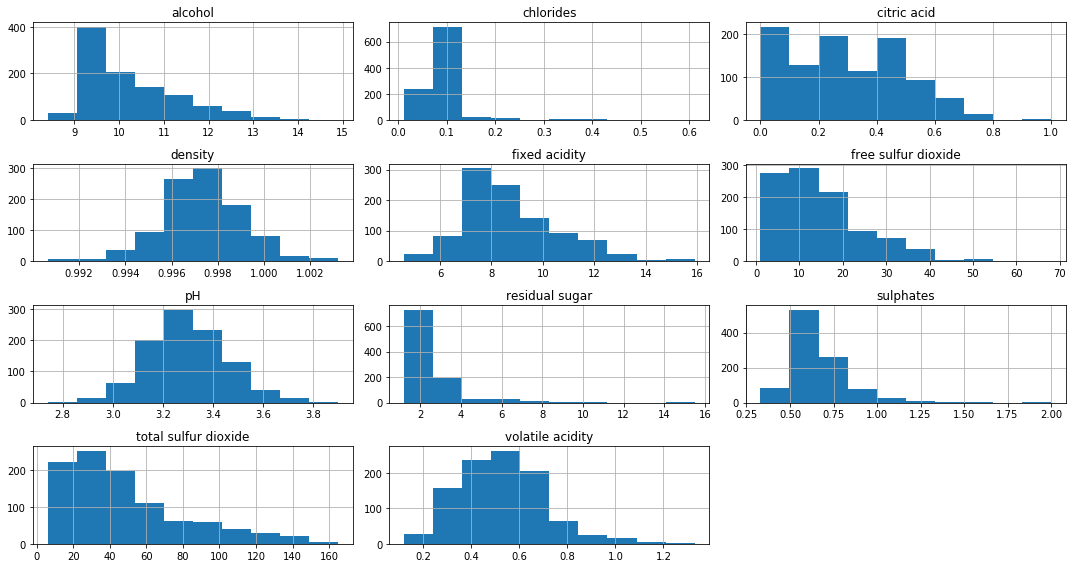

In [48]:
w_X.hist(figsize=(15, 8))
plt.tight_layout()

In [49]:
w_X.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [ ]:
skewed_log = np.log(w_X[skewed]+1)

In [81]:
skewed_cbrt = np.cbrt(w_X)

In [77]:
w_X.skew()

density                -0.058378
pH                      0.185529
fixed acidity           0.448579
volatile acidity       -0.042049
citric acid            -1.175578
residual sugar          2.127810
chlorides               3.129732
free sulfur dioxide     0.325153
total sulfur dioxide    0.352191
sulphates               1.511270
alcohol                 1.034813
dtype: float64

In [78]:
skewed_log.skew()

fixed acidity           0.313598
volatile acidity        0.306730
citric acid            -0.004102
residual sugar          1.913954
chlorides               5.108652
free sulfur dioxide    -0.011285
total sulfur dioxide   -0.045723
sulphates               1.801621
alcohol                 0.982099
dtype: float64

In [79]:
skewed_cbrt.skew()

fixed acidity           0.448579
volatile acidity       -0.042049
citric acid            -1.175578
residual sugar          2.127810
chlorides               3.129732
free sulfur dioxide     0.325153
total sulfur dioxide    0.352191
sulphates               1.511270
alcohol                 1.034813
dtype: float64

Plot the histogram of the transformed X to see if your transformations are successful

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa0e8619f50>,
      dtype=object)

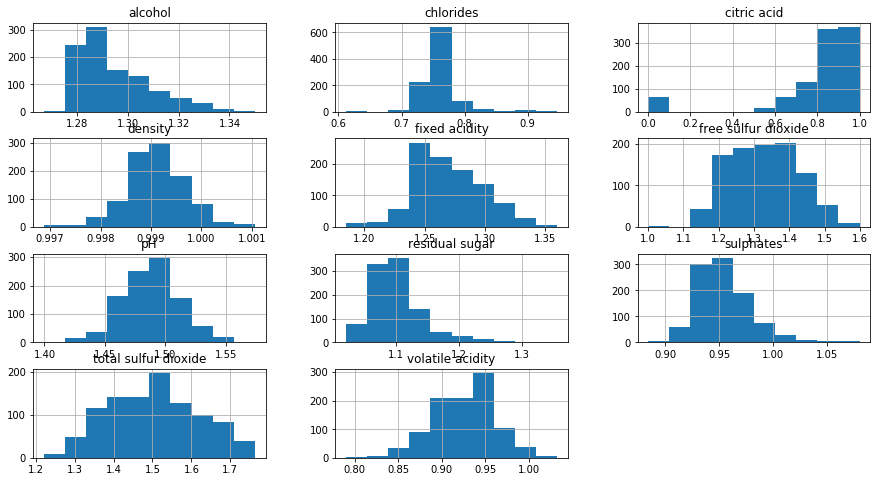

In [97]:
# I choose to use the cubic root because it improves skewness most significantly
skewed_cbrt.hist(figsize=(15, 8))

In [101]:
skewed_cbrt_test = np.cbrt(w_test)

In [102]:
w_scaler = StandardScaler().fit(skewed_cbrt)
w_X_scaled = w_scaler.transform(skewed_cbrt)
w_test_scaled = w_scaler.transform(skewed_cbrt_test)

w_X_scaled = pd.DataFrame(w_X_scaled)
w_test_scaled = pd.DataFrame(X_test_scaled)

In [103]:
X_train = w_X_scaled.iloc[:700,:]
y_train = w_y.iloc[:700,:]
X_val = w_X_scaled.iloc[700:,:]
y_val = w_y.iloc[700:,:]

## Decision Tree

In [104]:
from sklearn.tree import DecisionTreeClassifier
### Fit the classifier on the training data
# Please set random_state=20
DTC = DecisionTreeClassifier(random_state=20)
DTC.fit(X_train, y_train.values.ravel())

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=20, splitter='best')

In [105]:
### Make predictions on the training data
y_preds_train = DTC.predict(X_train)

In [106]:
print(accuracy(y_train.values, y_preds_train))
print(precision(y_train.values, y_preds_train))
print(recall(y_train.values, y_preds_train))

1.0
1.0
1.0


In [107]:
### Make predictions on the validation data
y_preds_val = DTC.predict(X_val)

Print accuracy, precision and recall for the predictions made on the validation data. 

In [109]:
print(accuracy(y_val.values, y_preds_val))
print(precision(y_val.values, y_preds_val))
print(recall(y_val.values ,y_preds_val))

0.6366666666666667
0.6385542168674698
0.6838709677419355


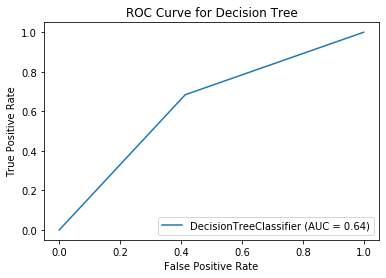

In [110]:
# Plot the ROC curve by giving appropriate names for title and axes. 
metrics.plot_roc_curve(DTC, X_val, y_val)
plt.title('ROC Curve for Decision Tree')
plt.show()

## Random Forest

In [111]:
from sklearn.ensemble import RandomForestClassifier
### Fit the classifier on the training data
# Please set random_state=20
RFC = RandomForestClassifier(random_state=20)
RFC.fit(X_train, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=20, verbose=0,
                       warm_start=False)

In [112]:
### Make predictions on the training data
y_preds_train = RFC.predict(X_train)

In [113]:
print(accuracy(y_train.values, y_preds_train))
print(precision(y_train.values, y_preds_train))
print(recall(y_train.values, y_preds_train))

1.0
1.0
1.0


In [114]:
### Make predictions on the validation data
y_preds_val = RFC.predict(X_val)

In [115]:
print(accuracy(y_val.values, y_preds_val))
print(precision(y_val.values, y_preds_val))
print(recall(y_val.values, y_preds_val))

0.7433333333333333
0.7294117647058823
0.8


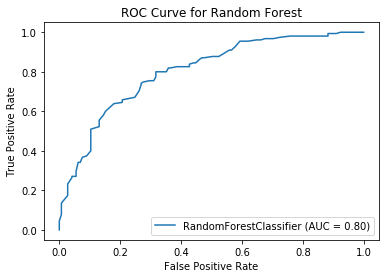

In [116]:
# Plot the ROC curve by giving appropriate names for title and axes. 
metrics.plot_roc_curve(RFC, X_val, y_val)
plt.title('ROC Curve for Random Forest')
plt.show()

In [117]:
from sklearn.model_selection import GridSearchCV

In [118]:
# In the below dictionary, fill in the list of values that you want to try out for each parameter
# Refer to the descriptions in sklearn's doc to understand what the parameters depict
param_grid = {
     'max_depth': [20, 40, 60, 80, 100, None],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [2, 4],
     'min_samples_split': [2, 5],
     'n_estimators': [200, 400, 600, 800]
}

In [119]:
rf = RandomForestClassifier(random_state=20)

In [120]:
# We use f1_score in this question
grid_search = GridSearchCV(estimator = rf, scoring='f1', param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2) 

In [121]:
# Fit the training data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 192 candidates, totalling 576 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   40.5s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 576 out of 576 | elapsed:  2.6min finished
/Users/wjq/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=20,
                                  

In [122]:
# Print the best parameters
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=800,
                       n_jobs=None, oob_score=False, random_state=20, verbose=0,
                       warm_start=False)

In [123]:
# Print the best score
grid_search.best_score_

0.661215092097445

In [124]:
rf_final = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=20, verbose=0,
                       warm_start=False)
rf_final.fit(X_train, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=20, verbose=0,
                       warm_start=False)

In [125]:
# Using the best model, do the following:
# Make predictions on the training set and display accuracy, precision and recall.
y_preds_train = rf_final.predict(X_train)
print(accuracy(y_train.values, y_preds_train))
print(precision(y_train.values, y_preds_train))
print(recall(y_train.values, y_preds_train))

0.9914285714285714
0.9940828402366864
0.9882352941176471


In [126]:
# Make predictions on the validation set and display accuracy, precision and recall. 
y_preds_val = rf_final.predict(X_val)
print(accuracy(y_val.values, y_preds_val))
print(precision(y_val.values, y_preds_val))
print(recall(y_val.values, y_preds_val))

0.7266666666666667
0.7134502923976608
0.7870967741935484


Text(0.5, 1.0, 'ROC Curve for Random Forest - Final Model')

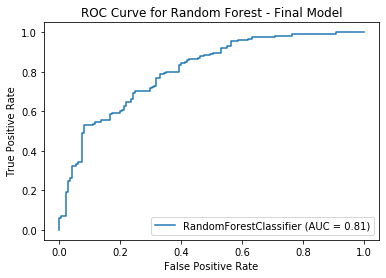

In [127]:
# Using the best model, plot the ROC curve by giving appropriate names for title and axes. 
metrics.plot_roc_curve(rf_final, X_val, y_val)
plt.title('ROC Curve for Random Forest - Final Model')

### Test

In [128]:
# Construct your final random forest using the best hyperparameters obtained above
rf_final.fit(w_X, w_y.values.ravel())
y_pred2 = rf_final.predict(w_test)
# return the prediction as "y_pred2"
y_pred2 

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1], d

In [ ]:
#end